# **E-Commerce Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

online_retail=pd.read_csv("online_retail.csv")
online_retail['InvoiceDate']=pd.to_datetime(online_retail['InvoiceDate'])


In [2]:
online_retail.info()
online_retail.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [3]:
online_retail.sort_values(['InvoiceDate','CustomerID'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
online_retail.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
online_retail['CustomerID'].isna().sum()/len(online_retail)


0.249266943342886

Almost 25% of all records doesn't have CustomerID information.


In [6]:
online_retail['Description'].isna().sum()/len(online_retail)

0.002683107311375157

Only 0.2% records does not have product description.


In [7]:
online_retail['returns']=list(map(lambda x: x.startswith('C'),online_retail['InvoiceNo']))
len(online_retail[online_retail['returns']==True])

9288

Dataset contains 9288 cancellations.

In [8]:
x=online_retail.loc[online_retail['Quantity']<=0]
returns=x[['StockCode','Description','Quantity']].groupby(['StockCode','Description']).sum('Quantity').sort_values('Quantity')
returns['Quantity']=returns['Quantity'].abs()
returns.head(10)



,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,74494
23005,printing smudges/thrown away,19200
84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9376
23003,Printing smudges/thrown away,9058
72140F,throw away,5368
79323W,"Unsaleable, destroyed.",4830
M,Manual,4066
21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3150


The most returns has product with Stock Code 23843 - PAPER CRAFT, LITTLE BIRDIE

In [9]:
online_retail['StockCode'].nunique()

4070

Dataset contains over 4000 unique products.

In [10]:
online_retail['Country'].value_counts(normalize=True)


United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

Over 90% of records comes from UK.

In [11]:
online_retail.groupby('Country').size().sort_values(ascending=False)


Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [12]:
online_retail['total']=online_retail['Quantity']*online_retail['UnitPrice']
UK_online_retail=online_retail[online_retail['Country']=='United Kingdom']
UK_online_retail.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,returns,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34


Text(0, 0.5, 'Sales - total in millions $')

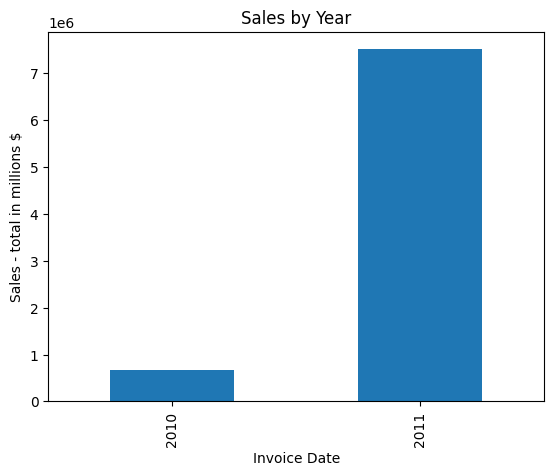

In [13]:
ax=UK_online_retail.groupby(UK_online_retail['InvoiceDate'].dt.to_period('Y'))['total'].sum().plot(kind='bar',title='Sales by Year')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Sales - total in millions $')


Text(0, 0.5, 'Sales in millions $')

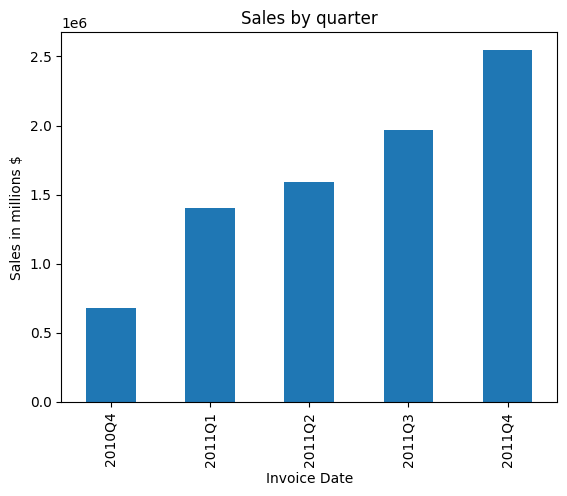

In [14]:
ax=UK_online_retail.groupby(UK_online_retail['InvoiceDate'].dt.to_period('Q'))['total'].sum().plot(kind='bar',title='Sales by quarter')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Sales in millions $')

Text(0, 0.5, 'Sales in millions $')

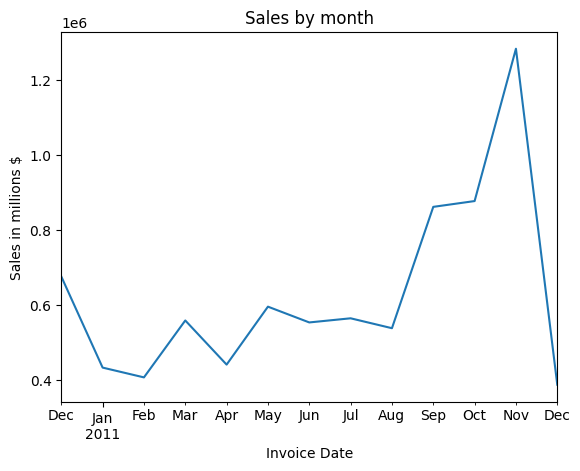

In [15]:
ax=UK_online_retail.groupby(UK_online_retail['InvoiceDate'].dt.to_period('M'))['total'].sum().plot(title='Sales by month')
ax.set_xlabel('Invoice Date')
ax.set_ylabel('Sales in millions $')

Huge increase of sales can be observed between years 2010 and 2011. 2011Q4 beat sales of 2010Q4 by almost five times.

In [16]:
other_orders=online_retail[(online_retail['Country']!='United Kingdom') & (online_retail                                                                   ['Quantity']>0)]
other_orders['Quantity'].describe()


count    44999.000000
mean        20.604058
std         47.310998
min          1.000000
25%          5.000000
50%         12.000000
75%         18.000000
max       2400.000000
Name: Quantity, dtype: float64

In [17]:
UK_orders=UK_online_retail[UK_online_retail['Quantity']>0]
UK_orders['Quantity'].describe()

count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [18]:
Q1=other_orders['Quantity'].quantile(0.25)
Q3=other_orders['Quantity'].quantile(0.75)
IQRO=Q3-Q1
iqro=other_orders[(other_orders['Quantity']>Q1-1.5*IQRO)&(other_orders['Quantity']<Q3+1.5*IQRO)]['Quantity']
Q1U=UK_orders['Quantity'].quantile(0.25)
Q3U=UK_orders['Quantity'].quantile(0.75)
IQRUK=Q3U-Q1U
iqruk=UK_orders[(UK_orders['Quantity']>Q1U-1.5*IQRUK)&(UK_orders['Quantity']<Q3U+1.5*IQRUK)]['Quantity']


In [19]:
iqro.describe()

count    40480.000000
mean        10.429570
std          7.710851
min          1.000000
25%          4.000000
50%         10.000000
75%         12.000000
max         36.000000
Name: Quantity, dtype: float64

In [20]:
iqruk.describe()

count    439945.000000
mean          4.466961
std           4.336253
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          23.000000
Name: Quantity, dtype: float64

Text(0.5, 1.0, 'Size of orders - comparision')

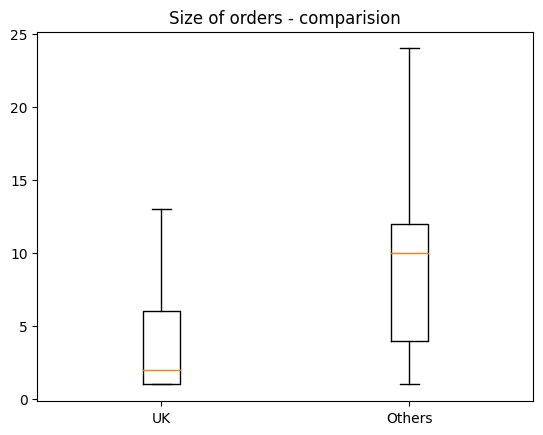

In [27]:
#iqro.plot(kind='box')
iqrc=[iqruk,iqro]
names=('UK','Others')
plt.boxplot(iqrc,labels=names,showfliers=False)
plt.title('Size of orders - comparision')


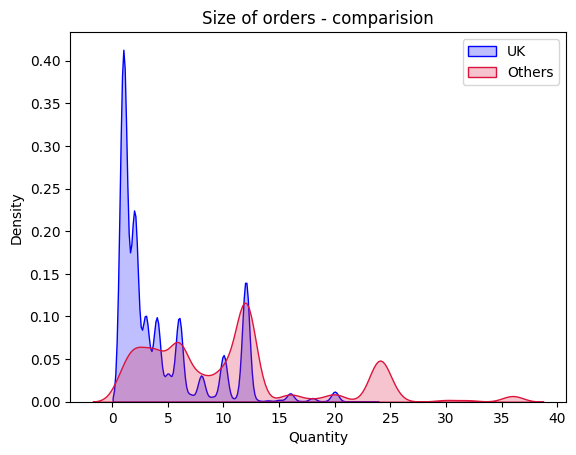

In [22]:
sns.kdeplot(iqruk,color='blue',fill=True,label='UK').set(title='Size of orders - comparision')
sns.kdeplot(iqro,color='crimson',fill=True,label='Others')
plt.legend()


Most orders from UK contains up to 5 products.* 
Orders from other countries are higher on average with the mean of 10 products.**


*Mean of sample without outliers. Total mean is equal to 9.7 products per order. (UK)
**Mean of sample without outliers. Total mean is eqaul to 20.6 products per order. (Other countries)

[112153, 339087, 87992]


Text(0, 0.5, 'Number of products')

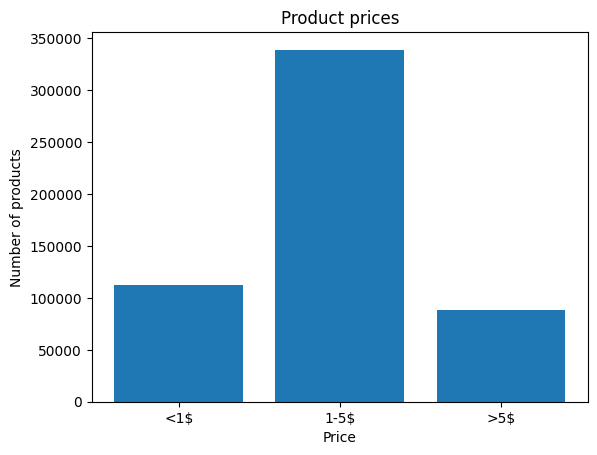

In [23]:

prices=pd.DataFrame()
a=online_retail.loc[((online_retail['UnitPrice']<1)&(online_retail['UnitPrice']>0)),:]
b=online_retail.loc[((online_retail['UnitPrice']>1)&(online_retail['UnitPrice']<5)),:]
c=online_retail.loc[(online_retail['UnitPrice']>5),:]
prices=[a['UnitPrice'].count(),b['UnitPrice'].count(),c['UnitPrice'].count()]
print(prices)
names2=['<1$','1-5$','>5$']

plt.bar(names2,prices)
plt.title('Product prices')
plt.xlabel('Price')
plt.ylabel('Number of products')


In [24]:
online_retail2=np.where(online_retail['UnitPrice']>0)

In [25]:
for x,z in enumerate(prices):
    print(names2[x],' - ',f"{prices[x]/sum(prices):.0%}")
      

<1$  -  21%
1-5$  -  63%
>5$  -  16%


Over 60% of products cost between 1 and 5 dollars. 21% products cost less than a dollar and 16% are more expensive than 5 dollars.

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).